In [31]:
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt
import time
import torch
from pymoo.visualization.scatter import Scatter
from metrics import mean_Euclidean_dist
from partitioning import sampling_vector_randomly, sampling_vector_evenly
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.problems import get_problem

In [32]:
problem_name = "DTLZ2"
n_sample = 50

pref_vec_test = get_reference_directions("das-dennis", 3, n_partitions=50)
truth_front =  np.transpose(get_problem("dtlz2").pareto_front(pref_vec_test))

pref_vec_test = sampling_vector_evenly(3, 300)
f_truth =  get_problem("dtlz2").pareto_front(pref_vec_test)
# f_truth = np.load(f"logs_{problem_name}/y_{problem_name}_6_original.npy")[49]

In [33]:
def plot_compare1(problem_name = "DTLZ2", n_dim = 5, suffix = "", title = ""):
    log_dir = f"logs_{problem_name}_ablation"
    # index = [1, 5, 10, 20, 25, 30, 40, 45, 50]
    index = [16, 20, 24, 28, 32, 36, 40, 44, 48]
    y_value = np.load(f"{log_dir}/y_{problem_name}_{n_dim}{suffix}.npy")
    font_size = 10
    scatter_size = 10
    front_value = np.load(f"{log_dir}/front_{problem_name}_{n_dim}{suffix}.npy")
    
    fig, axs = plt.subplots(figsize = (10, 10), ncols = int(len(index)/3), nrows=3, layout="constrained", subplot_kw=dict(projection='3d'))
    axs = axs.flatten()
    
    for i, ind in enumerate(index):    
        y_truth, y_hat = y_value[ind - 1], front_value[ind - 1]
        euclidean_score = mean_Euclidean_dist(f_truth, y_hat)
        axs[i].view_init(elev=10., azim=30)
        axs[i].scatter(truth_front[0], truth_front[1], truth_front[2], color="green", s=0.1, label="DTLZ2 Pareto Front")
        axs[i].scatter(y_hat[:, 0], y_hat[:, 1], y_hat[:, 2], s=scatter_size , zorder=2, color = "blue", label = "Pareto Solutions computed by Surrogate Model")
        axs[i].set_title(f"Number of evaluations: {5*ind+180}", fontsize=font_size, y=0.97)
        axs[i].set_xlabel(r'$f_1(x)$', color="blue")
        axs[i].set_ylabel(r'$f_2(x)$', color="blue")
        axs[i].set_zlabel(r'$f_3(x)$', rotation=0, color="blue")
        axs[i].zaxis.labelpad=-0.7
        # axs[i].set_title(f"Iteration: {ind}\nPareto front score: {round(euclidean_score, 6)}", fontsize=font_size)
        
    fig.legend(*axs[1].get_legend_handles_labels(), bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=2, fontsize=font_size)
    fig.suptitle(f"{title} on {problem_name} with {n_dim} variables",fontweight="bold",fontsize=font_size + 5)
    fig.savefig(f"{problem_name}-{title}.pdf", bbox_inches='tight')
    plt.show()

In [34]:
def plot_compare2(problem_name = "DTLZ2", n_dim = 5, suffix = "", title = ""):
    log_dir = f"logs_{problem_name}_ablation"
    # index = [1, 5, 10, 20, 25, 30, 40, 45, 50]
    index = [16, 20, 24, 28, 32, 36, 40, 44, 48]
    y_value = np.load(f"{log_dir}/y_{problem_name}_{n_dim}{suffix}.npy")
    font_size = 10
    scatter_size = 10
    front_value = np.load(f"{log_dir}/front_{problem_name}_{n_dim}{suffix}.npy")
    
    fig, axs = plt.subplots(figsize = (10, 10), ncols = int(len(index)/3), nrows=3, layout="constrained", subplot_kw=dict(projection='3d'))
    axs = axs.flatten()
    
    for i, ind in enumerate(index):   
        ind += 40
        y_truth, y_hat = y_value[ind - 1], front_value[ind - 1]
        euclidean_score = mean_Euclidean_dist(f_truth, y_hat)
        axs[i].view_init(elev=10., azim=30)
        axs[i].scatter(truth_front[0], truth_front[1], truth_front[2], color="green", s=0.1, label="DTLZ2 Pareto Front")
        axs[i].scatter(y_hat[:, 0], y_hat[:, 1], y_hat[:, 2], s=scatter_size , zorder=2, color = "blue", label = "Pareto Solutions computed by Surrogate Model")
        axs[i].set_title(f"Number of evaluations: {5*ind-20}", fontsize=font_size, y=0.97)
        axs[i].set_xlabel(r'$f_1(x)$', color="blue")
        axs[i].set_ylabel(r'$f_2(x)$', color="blue")
        axs[i].set_zlabel(r'$f_3(x)$', rotation=0, color="blue")
        axs[i].zaxis.labelpad=-0.7
        fig.suptitle(f"{title} - Problem {problem_name}",fontweight="bold",fontsize=font_size + 5)
        
    fig.legend(*axs[1].get_legend_handles_labels(), bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=2, fontsize=font_size)
    fig.suptitle(f"{title} on {problem_name} with {n_dim} variables",fontweight="bold",fontsize=font_size + 5)
    fig.savefig(f"{problem_name}-{title}.pdf", bbox_inches='tight')
    plt.show()

In [35]:
def Mean_Euclidean_distance_plot(problem_name = "DTLZ2", n_dim = 5, suffix = "", title = ""):
    log_dir = f"logs_{problem_name}"
    front_value = np.load(f"{log_dir}/front_{problem_name}_{n_dim}{suffix}.npy")
    euclidean_score = []
    for i in range(50):
        euclidean_score.append(mean_Euclidean_dist(f_truth, front_value[i]))
        
    plt.plot(euclidean_score, color = "green")
    plt.ylabel(r"Mean Euclidean distance score")
    plt.xlabel("Iteration")
    plt.title(f"{title}")
    plt.show()

In [36]:
def Mean_Euclidean_distance_plot2(problem_name = "DTLZ2", n_dim = 6):
    MED_2stage_EHVI_120, MED_2stage_DGEMO_120, MED_2stage_EHVI_220, MED_2stage_DGEMO_220 = [],[],[],[]
    log_dir = f"logs_{problem_name}"
    
    f_2stage_EHVI_120 = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_EHVI_120_uniform.npy")
    f_2stage_DGEMO_120 = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_120_uniform.npy")
    f_2stage_EHVI_220 = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_EHVI_220_uniform.npy")
    f_2stage_DGEMO_220 = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_220_uniform.npy")
    
    
    for i in range(50):
        MED_2stage_EHVI_120.append(mean_Euclidean_dist(f_truth, f_2stage_EHVI_120[i]))
        MED_2stage_DGEMO_120.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_120[i]))
        MED_2stage_EHVI_220.append(mean_Euclidean_dist(f_truth, f_2stage_EHVI_220[i]))
        MED_2stage_DGEMO_220.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_220[i]))
        
    plt.plot(MED_2stage_EHVI_120, color = "blue", label = "2 stage warm up with EHVI 120")
    plt.plot(MED_2stage_DGEMO_120, color = "green", label = "2 stage warm up with DGEMO 120")
    plt.plot(MED_2stage_EHVI_220, color = "orange", label = "2 stage warm up with EHVI 220")
    plt.plot(MED_2stage_DGEMO_220, color = "purple", label = "2 stage warm up with DGEMO 220")
    plt.ylabel("Mean Euclidean Score")
    plt.xlabel("Evaluation")
    plt.title(r'Mean Eculidean distance between True Pareto Front $f_{true}(x)$'
              '\nand Pareto front computed by Surrogate model 'r'$\hat f(x)$')
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=2)
    
    plt.show()

In [37]:
def Mean_Euclidean_distance_ablation(problem_name = "DTLZ2", n_dim = 6):
    MED_original, MED_warmup, MED_init_uniform, MED_2stage_DGEMO_220_uniform = [],[],[],[]
    log_dir = f"logs_{problem_name}_ablation"
    
    f_original = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_original.npy")
    f_init_uniform = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_init_uniform.npy")
    f_warmup = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup.npy")
    f_2stage_DGEMO_220_uniform = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_220_uniform.npy")
    
    for i in range(40, 90):
        MED_original.append(mean_Euclidean_dist(f_truth, f_original[i]))
        MED_init_uniform.append(mean_Euclidean_dist(f_truth, f_init_uniform[i]))
    for i in range(50):
        
        MED_warmup.append(mean_Euclidean_dist(f_truth, f_warmup[i]))
        MED_2stage_DGEMO_220_uniform.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_220_uniform[i]))
        
    plt.plot(MED_original, color = "black", label = "PSL-MOBO")
    plt.plot(MED_init_uniform, color = "green", label = r"MOBO-PSL with $\theta$ initialization")
    plt.plot(MED_warmup, color = "orange", label = "MOBO-PSL after DGEMO warm up")
    plt.plot(MED_2stage_DGEMO_220_uniform, color = "purple", label = "Co-PSL")
    plt.ylabel("Mean Euclidean Score")
    plt.xlabel("Number of evaluation")
    plt.axis(xmin=0, xmax=49)
    plt.xticks([0, 10, 20, 30, 40, 49], [220, 270, 320, 370, 420, 470])
    plt.title(r'Mean Eculidean distance between True Pareto Front $f_{true}(x)$'
              '\nand Pareto front computed by Surrogate model 'r'$\hat f(x)$')
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=2)
    plt.savefig(f"MED_ablation_DTLZ2.pdf", bbox_inches='tight')
    plt.show()

In [38]:
def Mean_Euclidean_distance_ablation_init(problem_name = "DTLZ2", n_dim = 6):
    MED_init_uniform, MED_2stage_DGEMO_220_uniform, MED_init_gaussian, MED_2stage_DGEMO_220_gaussian = [],[],[],[]
    log_dir = f"logs_{problem_name}"
    
    f_init_uniform = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_init_uniform.npy")
    f_2stage_DGEMO_220_uniform = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_220_uniform.npy")
    f_init_gaussian = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_init_gaussian.npy")
    f_2stage_DGEMO_220_gaussian = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_220_gaussian.npy")
    
    
    for i in range(50):
        MED_init_uniform.append(mean_Euclidean_dist(f_truth, f_init_uniform[i]))
        MED_2stage_DGEMO_220_uniform.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_220_uniform[i]))
        MED_init_gaussian.append(mean_Euclidean_dist(f_truth, f_init_gaussian[i]))
        MED_2stage_DGEMO_220_gaussian.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_220_gaussian[i]))
        
    
    plt.plot(MED_init_uniform, color = "green", label = r"PSL with $\theta$ initialization (Uniform)")
    plt.plot(MED_init_gaussian, color = "blue", label = r"PSL with $\theta$ initialization (Gaussian)")
    plt.plot(MED_2stage_DGEMO_220_uniform, color = "orange", label = "2 stage warm up with DGEMO 220 (Uniform)")
    plt.plot(MED_2stage_DGEMO_220_gaussian, color = "purple", label = "2 stage warm up with DGEMO 220 (Gaussian)")
    plt.ylabel("Mean Euclidean Score")
    plt.xlabel("Iteration")
    plt.title(r'Mean Eculidean distance between True Pareto Front $f_{true}(x)$'
              '\nand Pareto front computed by Surrogate model 'r'$\hat f(x)$')
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=2)
    plt.show()

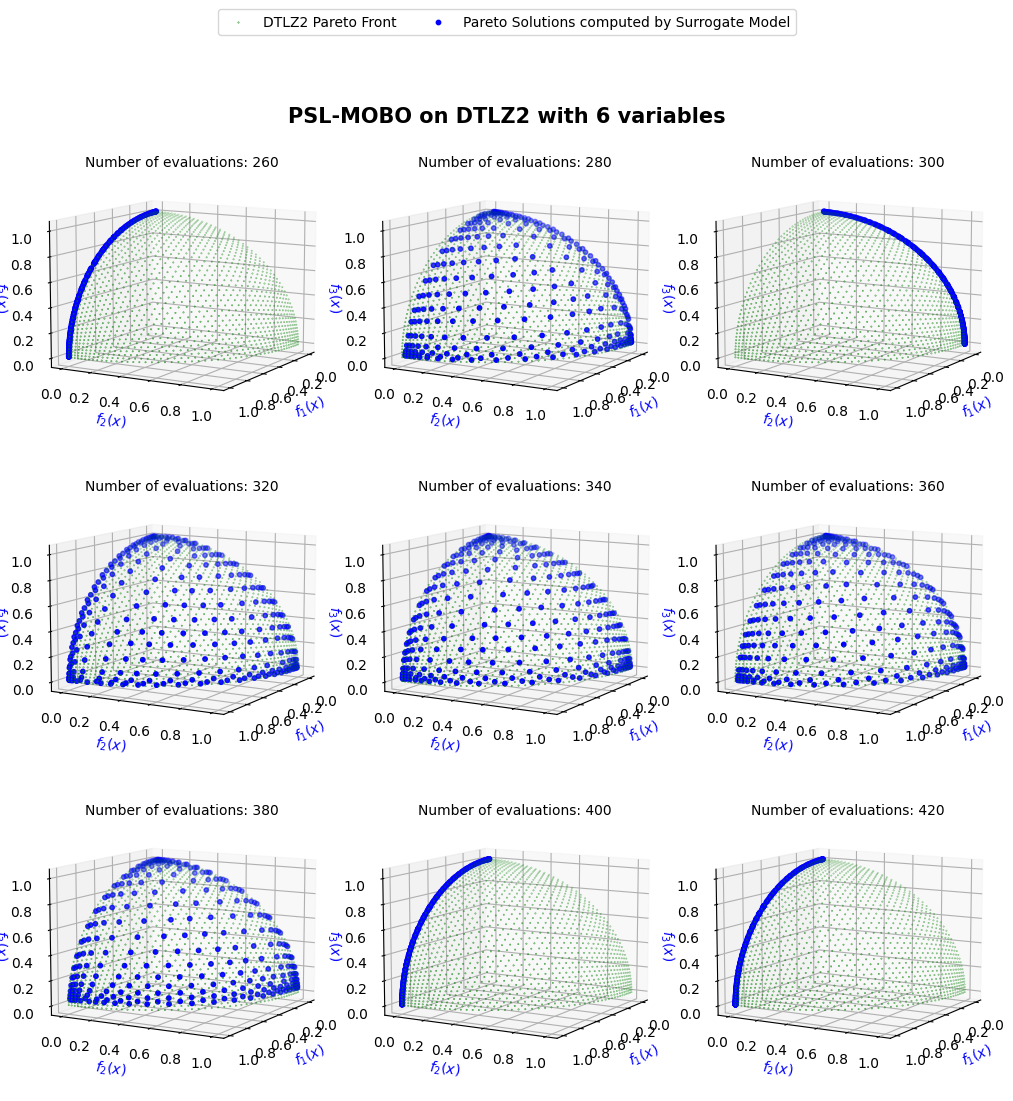

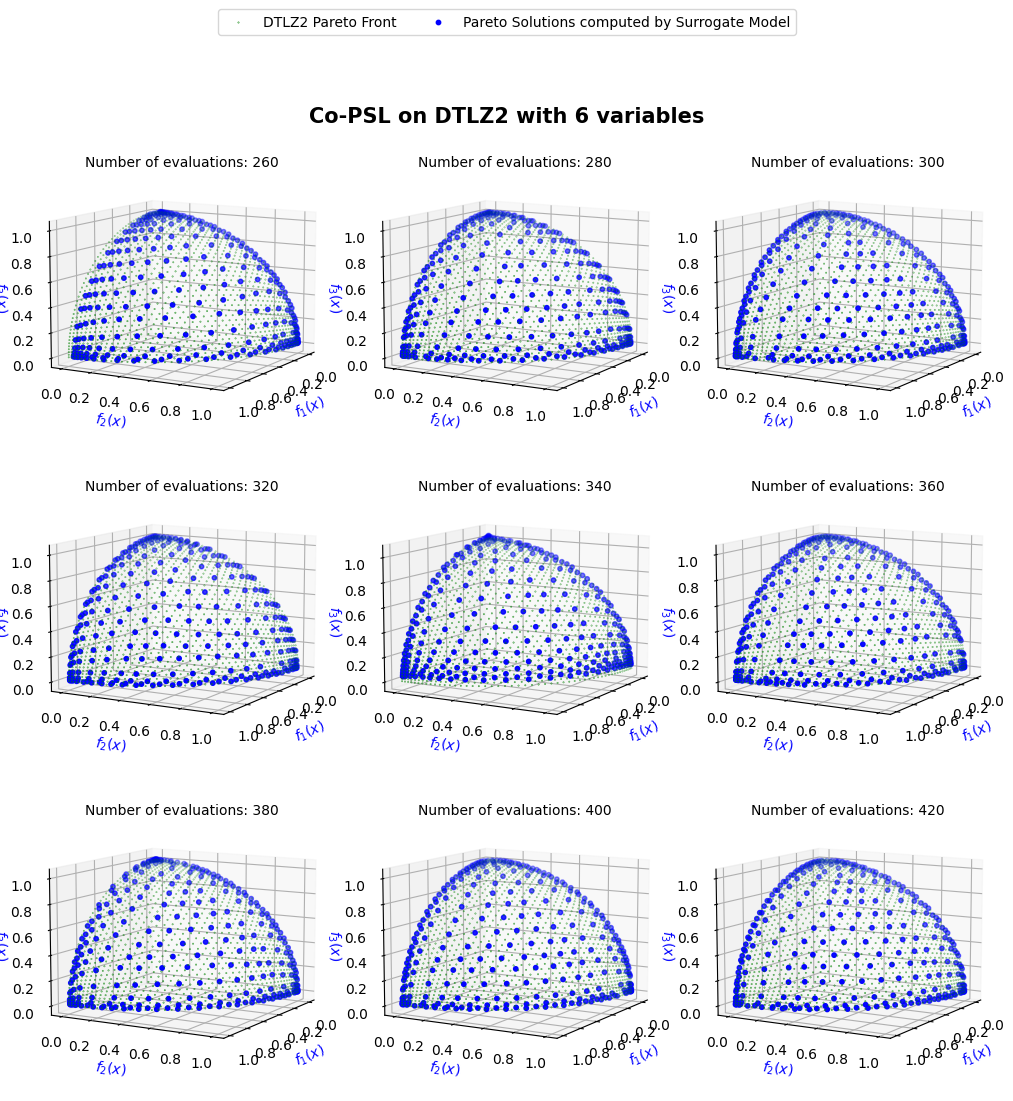

In [39]:
n_dim = 6
plot_compare2("DTLZ2", n_dim = n_dim, suffix="_original", title = "PSL-MOBO")
# plot_compare2("DTLZ2", n_dim, suffix="_init_uniform", title = "PSL_xavier_init")
# plot_compare1("DTLZ2", n_dim, suffix="_warmup", title = "PSL_warmup_DGEMO_220")
plot_compare1("DTLZ2", n_dim, suffix="_warmup_init_DGEMO_120_gaussian", title = "Co-PSL")

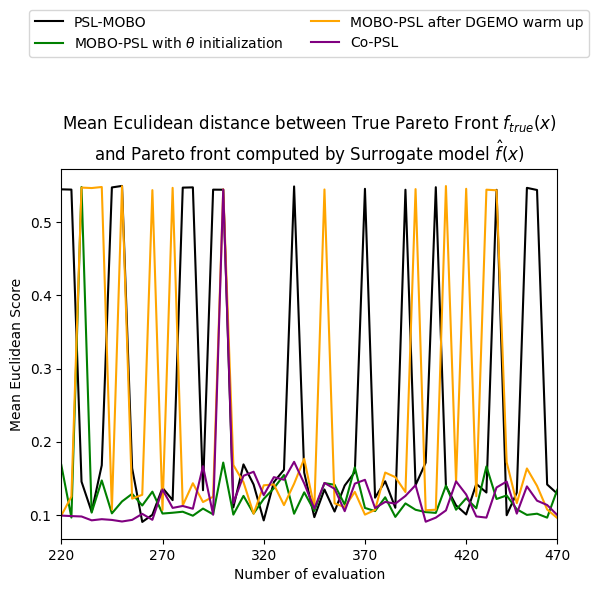

In [40]:
Mean_Euclidean_distance_ablation("DTLZ2", n_dim)
# Mean_Euclidean_distance_ablation_init("DTLZ2", n_dim)
# Mean_Euclidean_distance_plot2("DTLZ2", n_dim)